#### 導入必要Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

____________________________
#### 載入資料

In [25]:
df = pd.read_csv('Walmart_sales.csv') #原網址('https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data')

______________
#### 檢視資料

In [26]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [27]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


______________
#### 檢查是否有缺空

In [28]:
print('Sum of NA')
df.isna().sum()

Sum of NA


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

______________
#### 資料轉換 (華氏→攝氏、MM-DD-YYYY→YYYY-MM-DD)

In [29]:
# 轉換華氏到攝氏
df['Temperature_Celsius'] = df.apply(lambda x: 
            (x['Temperature'] - 32) * 5 / 9, axis=1)
# 轉換日期格式至YYYY-MM-DD
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

print(df[['Temperature', 'Temperature_Celsius']])

      Temperature  Temperature_Celsius
0           42.31             5.727778
1           38.51             3.616667
2           39.93             4.405556
3           46.63             8.127778
4           46.50             8.055556
...           ...                  ...
6430        64.88            18.266667
6431        64.89            18.272222
6432        54.47            12.483333
6433        56.47            13.594444
6434        58.85            14.916667

[6435 rows x 2 columns]


______________
#### 將資料分成三部分作散佈圖並探討氣溫對銷售額的影響

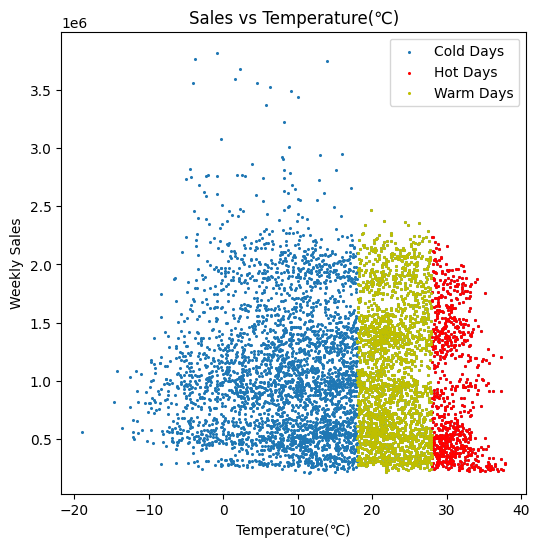

In [30]:
x = df['Temperature_Celsius']
y = df['Weekly_Sales']

hotDays = df[df['Temperature_Celsius'] > 28]
warmDays = df[(df['Temperature_Celsius'] < 28) & 
              (df['Temperature_Celsius'] > 18) ]

warmx = warmDays['Temperature_Celsius']
warmy = warmDays['Weekly_Sales']

hotx = hotDays['Temperature_Celsius']
hoty = hotDays['Weekly_Sales']

plt.figure(figsize=(6, 6))
plt.title('Sales vs Temperature(℃)')

plt.xlabel('Temperature(℃)')
plt.ylabel('Weekly Sales')

plt.scatter(x,y, s=1.5)
plt.scatter(hotx, hoty, s=1.5, c='r')
plt.scatter(warmx, warmy, s=1.5, c='y')

plt.legend(['Cold Days', 'Hot Days', 'Warm Days'])

##   **↑在超過28度的商店銷售額較少**

______________
#### 對超過28度的天氣和相對舒適的18~28度比較銷售數據

In [31]:
hotLen = hotDays.shape[0]
warmLen = warmDays.shape[0]
hotSum = hotDays['Weekly_Sales'].sum()
warmSum = warmDays['Weekly_Sales'].sum()
hotMean = hotDays['Weekly_Sales'].mean()
warmMean = warmDays['Weekly_Sales'].mean()
hotMedian = hotDays['Weekly_Sales'].median()
warmMedian = warmDays['Weekly_Sales'].median()

comparasons = pd.DataFrame({'Hot' : [hotLen, hotSum, hotMean, hotMedian],
                           'Warm' : [warmLen, warmSum, warmMean, warmMedian]
                           }, index=['Length', 'Sales', 'Mean', 'Median'])

comparasons = comparasons.map(lambda x: str(int(x)) if abs(x - int(x)) < 1e-6 else str(round(x, 2)))
comparasons

,Hot,Warm
Length,811,2207
Sales,750371116.56,2325340387.92
Mean,925241.82,1053620.47
Median,755098.41,964356.74


## 透過中位數，通常在18~28度時銷售額會比超過30度好

______________
#### 透過畫圖了解銷售額的分佈

960746.04


<Axes: xlabel='Weekly_Sales', ylabel='Count'>

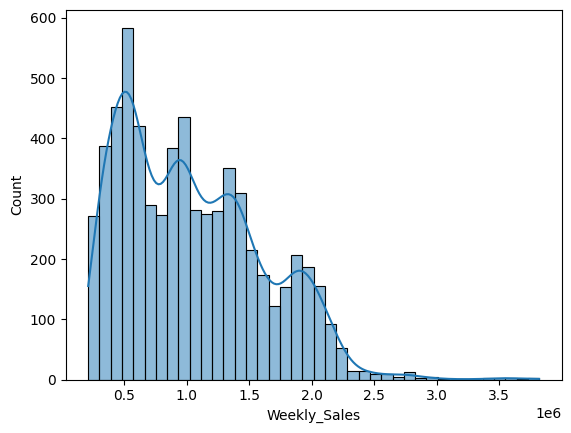

In [32]:
print(df['Weekly_Sales'].median())
sns.histplot(df['Weekly_Sales'], kde=True, bins=40)

______________
#### 去除非必要因素

In [33]:
df.drop('Temperature', axis=1, inplace=True)
df.drop('Store', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)


#### 畫出熱力圖來分析各個因素間的相關性

<Axes: title={'center': 'Correlation Matrix'}>

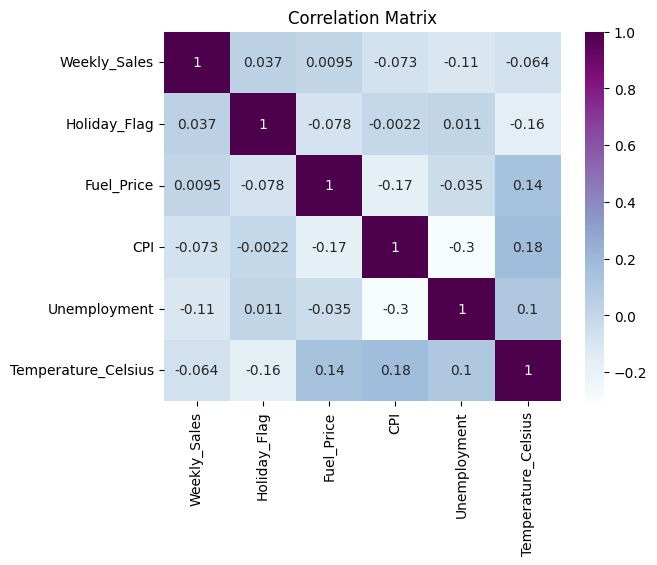

In [34]:
axes = plt.axes()

corrMatrix = df.corr()
axes.set_title('Correlation Matrix')
sns.heatmap(corrMatrix, annot=True, cmap='BuPu')

### **這張熱力圖若單看銷售額跟其他因素的關係**
### **就能看到當節慶來臨時，銷售額會有所上升。**
### **而油價和銷售額幾乎沒關聯**
### **消費者指數為負相關，有可能是物價的下降導致購買需求增加。一般情況下應該是正相關。**
### **當失業率下降時，銷售額會上升。**
### **當天氣變涼時，銷售額會些許上升。**